# МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ РОССИЙСКОЙ ФЕДЕРАЦИИ
##                               Московский физико-технический институт
##                                         (государственный университет)

##                                         Кафедра молекулярной физики

##                                                  Лабораторная работа

#                ИНФРАКРАСНАЯ СПЕКТРОСКОПИЯ ПОГЛОЩЕНИЯ.
#                      КОЛЕБАТЕЛЬНО-ВРАЩАТЕЛЬНЫЕ СПЕКТРЫ
#                                      ДВУХАТОМНЫХ МОЛЕКУЛ.


# Составили:
## A.E. Мишина 
## В.В. Зарубин 


###                                                                                   Москва
###                                                                                    МФТИ
###                                                                                     2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt

# Reference (air) 

In [48]:
names = ['Волновое число, v, см^-1', '', '','Волновое число, v, см^-1 ', ' ', '', 'Волновое число, v, см^-1  ', '  ', '', 'Волновое число, v, см^-1   ', '   ', '']
df_r = pd.read_excel('Vozdukh_Pri_Raznykh_Razresh.xlsx', sheet_name='Воздух при разных разреш.', header=None, names=names, skiprows=1, usecols=[0,1,2,4,5,6,8,9,10,12,13,14])

# Референтный спектр

In [81]:
df_r[:10]

Референтный спектр


,"Воздух, разрешение 1.0, без апод.",,.1,"Воздух, разрешение 0,5, без апод.",,.2,"Воздух, разрешение 2.0, без апод.",,.3,"Воздух, разрешение 4.0, без апод.",,.4
0,"Волновое число v, см^-1",Интенсивность,Нормировка,"Волновое число v, см^-1",Интенсивность,Нормировка,"Волновое число v, см^-1",Интенсивность,Нормировка,"Волновое число v, см^-1",Интенсивность,Нормировка
1,0,811206,0.00811206,0,671469,0.00671469,0,859333,0.00859333,0,587604,0.00587604
2,0.482281,878687,0.00878687,0.24114,2463680,0.0246368,0.964562,273578,0.00273578,1.92912,118618,0.00118618
3,0.964562,1079180,0.0107918,0.482281,4317250,0.0431725,1.92912,780594,0.00780594,3.85825,757592,0.00757592
4,1.44684,934295,0.00934295,0.723421,2166760,0.0216676,2.89369,1139620,0.0113962,5.78737,819286,0.00819286
5,1.92912,1266020,0.0126602,0.964562,1216800,0.012168,3.85825,747905,0.00747905,7.71649,297172,0.00297172
6,2.4114,1436270,0.0143627,1.2057,705003,0.00705003,4.82281,395740,0.0039574,9.64562,80716.9,0.000807169
7,2.89369,945033,0.00945033,1.44684,1373240,0.0137324,5.78737,427304,0.00427304,11.5747,301579,0.00301579
8,3.37597,662844,0.00662844,1.68798,691347,0.00691347,6.75193,479267,0.00479267,13.5039,386814,0.00386814
9,3.85825,816891,0.00816891,1.92912,2490950,0.0249095,7.71649,326198,0.00326198,15.433,193733,0.00193733


In [49]:
plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (18, 7)

In [3]:
df_r = df_r.set_index('Волновое число, v, см^-1') 

In [82]:
df_r[5000:5010]

,"Воздух, разрешение 1.0, без апод.",,.1,"Воздух, разрешение 0,5, без апод.",,.2,"Воздух, разрешение 2.0, без апод.",,.3,"Воздух, разрешение 4.0, без апод.",,.4
5000,2410.92,60720700,0.607207,1205.46,44621400,0.446214,4821.84,3675090,0.0367509,9643.69,64765.4,0.000647654
5001,2411.4,60593700,0.605937,1205.7,44610800,0.446108,4822.81,3659020,0.0365902,9645.62,60391.5,0.000603915
5002,2411.89,60566200,0.605662,1205.94,44605800,0.446058,4823.77,3651180,0.0365118,9647.55,56917.8,0.000569178
5003,2412.37,60666900,0.606669,1206.18,44619800,0.446198,4824.74,3650510,0.0365051,9649.48,60687.3,0.000606873
5004,2412.85,60661700,0.606617,1206.43,44638100,0.446381,4825.7,3646110,0.0364611,9651.41,62725.7,0.000627257
5005,2413.33,60530100,0.605301,1206.67,44630700,0.446307,4826.67,3645600,0.036456,9653.33,58522.2,0.000585222
5006,2413.82,60506700,0.605067,1206.91,44600100,0.446001,4827.63,3657790,0.0365779,9655.26,58239.4,0.000582394
5007,2414.3,60608200,0.606082,1207.15,44588900,0.445889,4828.6,3665550,0.0366555,9657.19,64584.9,0.000645849
5008,2414.78,60604000,0.60604,1207.39,44621800,0.446218,4829.56,3652720,0.0365272,9659.12,65290.3,0.000652903
5009,2415.26,60483200,0.604832,1207.63,44664500,0.446645,4830.53,3637920,0.0363792,9661.05,58091.2,0.000580912


In [83]:
df_r[15000:15010]

,"Воздух, разрешение 1.0, без апод.",,.1,"Воздух, разрешение 0,5, без апод.",,.2,"Воздух, разрешение 2.0, без апод.",,.3,"Воздух, разрешение 4.0, без апод.",,.4
15000,7233.73,118096,0.00118096,3616.87,9376060,0.0937606,14467.5,30067.8,0.000300678,NaN,NaN,0
15001,7234.21,111198,0.00111198,3617.11,9347800,0.093478,14468.4,22487.1,0.000224871,NaN,NaN,0
15002,7234.7,112474,0.00112474,3617.35,9281640,0.0928164,14469.4,29757.2,0.000297572,NaN,NaN,0
15003,7235.18,105937,0.00105937,3617.59,9116030,0.0911603,14470.4,40199.8,0.000401998,NaN,NaN,0
15004,7235.66,97311.4,0.000973114,3617.83,8943970,0.0894397,14471.3,42702.5,0.000427025,NaN,NaN,0
15005,7236.14,99482,0.00099482,3618.07,8890150,0.0889015,14472.3,37478.9,0.000374789,NaN,NaN,0
15006,7236.62,103751,0.00103751,3618.31,8953210,0.0895321,14473.2,33600.4,0.000336004,NaN,NaN,0
15007,7237.11,97051.2,0.000970512,3618.55,9017830,0.0901783,14474.2,33847,0.00033847,NaN,NaN,0
15008,7237.59,89661.6,0.000896616,3618.79,9000110,0.0900011,14475.2,36042.6,0.000360426,NaN,NaN,0
15009,7238.07,95580,0.0009558,3619.04,8937240,0.0893724,14476.1,37916.6,0.000379166,NaN,NaN,0


In [84]:
df_r[30000:30010]

,"Воздух, разрешение 1.0, без апод.",,.1,"Воздух, разрешение 0,5, без апод.",,.2,"Воздух, разрешение 2.0, без апод.",,.3,"Воздух, разрешение 4.0, без апод.",,.4
30000,14467.9,44453.1,0.000444531,7233.97,107822,0.00107822,NaN,NaN,0,NaN,NaN,0
30001,14468.4,35669.3,0.000356693,7234.21,127544,0.00127544,NaN,NaN,0,NaN,NaN,0
30002,14468.9,35085.4,0.000350854,7234.45,144106,0.00144106,NaN,NaN,0,NaN,NaN,0
30003,14469.4,40604.4,0.000406044,7234.7,137707,0.00137707,NaN,NaN,0,NaN,NaN,0
30004,14469.9,46600.5,0.000466005,7234.94,122755,0.00122755,NaN,NaN,0,NaN,NaN,0
30005,14470.4,37889.9,0.000378899,7235.18,126973,0.00126973,NaN,NaN,0,NaN,NaN,0
30006,14470.8,28608.7,0.000286087,7235.42,146354,0.00146354,NaN,NaN,0,NaN,NaN,0
30007,14471.3,35228.8,0.000352288,7235.66,148650,0.0014865,NaN,NaN,0,NaN,NaN,0
30008,14471.8,42727.4,0.000427274,7235.9,122580,0.0012258,NaN,NaN,0,NaN,NaN,0
30009,14472.3,38968.9,0.000389689,7236.14,96114.5,0.000961145,NaN,NaN,0,NaN,NaN,0


In [85]:
df_r[60000:60010]

,"Воздух, разрешение 1.0, без апод.",,.1,"Воздух, разрешение 0,5, без апод.",,.2,"Воздух, разрешение 2.0, без апод.",,.3,"Воздух, разрешение 4.0, без апод.",,.4
60000,NaN,NaN,0,14468.2,38920.1,0.000389201,NaN,NaN,0,NaN,NaN,0
60001,NaN,NaN,0,14468.4,41490.8,0.000414908,NaN,NaN,0,NaN,NaN,0
60002,NaN,NaN,0,14468.7,28207.8,0.000282078,NaN,NaN,0,NaN,NaN,0
60003,NaN,NaN,0,14468.9,29537.7,0.000295377,NaN,NaN,0,NaN,NaN,0
60004,NaN,NaN,0,14469.2,35021.9,0.000350219,NaN,NaN,0,NaN,NaN,0
60005,NaN,NaN,0,14469.4,44782.3,0.000447823,NaN,NaN,0,NaN,NaN,0
60006,NaN,NaN,0,14469.6,43314.4,0.000433144,NaN,NaN,0,NaN,NaN,0
60007,NaN,NaN,0,14469.9,36672.8,0.000366728,NaN,NaN,0,NaN,NaN,0
60008,NaN,NaN,0,14470.1,43276.5,0.000432765,NaN,NaN,0,NaN,NaN,0
60009,NaN,NaN,0,14470.4,43314.5,0.000433145,NaN,NaN,0,NaN,NaN,0


Text(0.5, 1.0, 'Спектр пропускания воздух разрешение 1.0 без аподизации')

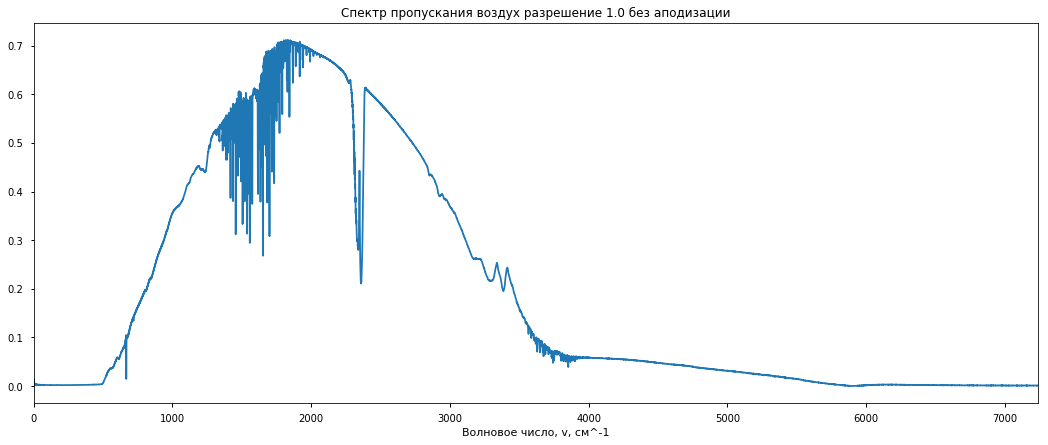

In [18]:
df_r['.1'][0:7238.07].plot().set_title('Спектр пропускания воздух разрешение 1.0 без аподизации')

In [9]:
df_r = df_r.set_index('Волновое число, v, см^-1  ') # take the longest series for ground ax

Text(0.5, 1.0, 'Спектр пропускания воздух разрешение 2.0 без аподизации')

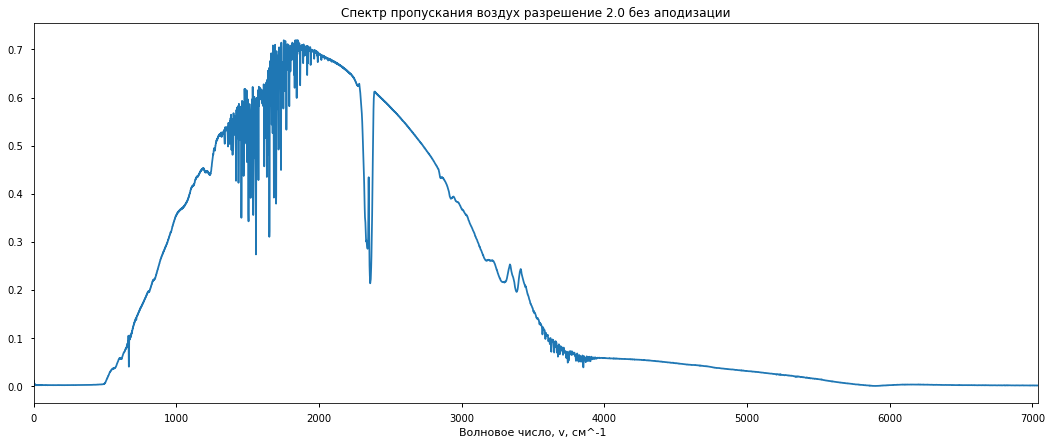

In [10]:
df_r['.3'][0:7039.37].plot().set_title('Спектр пропускания воздух разрешение 2.0 без аподизации')

In [21]:
df_r = df_r.set_index('Волновое число, v, см^-1   ')

Text(0.5, 1.0, 'Спектр пропускания воздух разрешение 4.0 без аподизации')

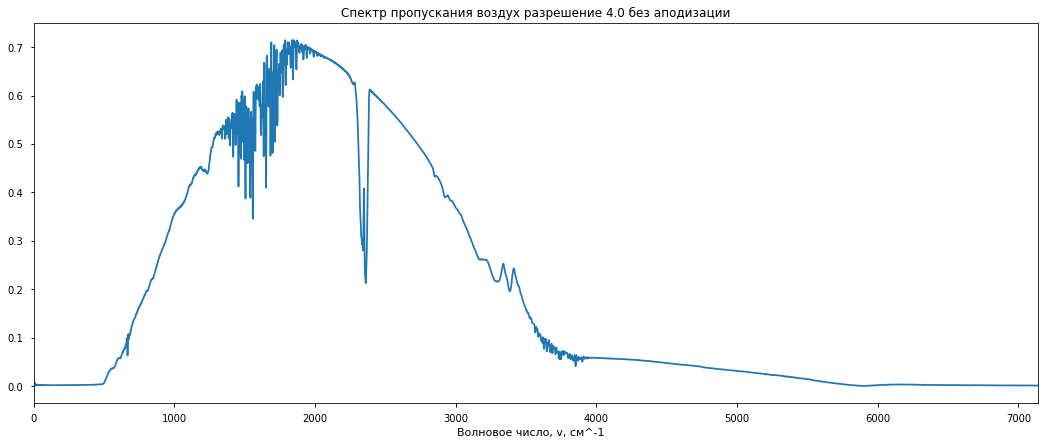

In [23]:
df_r['.4'][0:7139.69].plot().set_title('Спектр пропускания воздух разрешение 4.0 без аподизации')

In [50]:
df_r = df_r.set_index('Волновое число, v, см^-1 ') # take the longest series for ground ax

Text(0.5, 1.0, 'Спектр пропускания воздух разрешение 0.5 без аподизации')

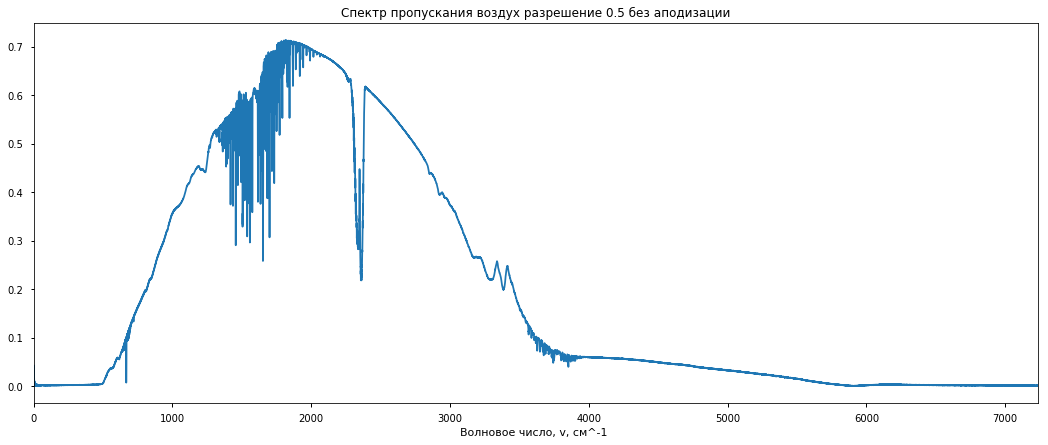

In [6]:
df_r['.2'][0:7236.14].plot().set_title('Спектр пропускания воздух разрешение 0.5 без аподизации')

Text(0.5, 1.0, 'Сравнение спектр пропускания воздух без аподизации')

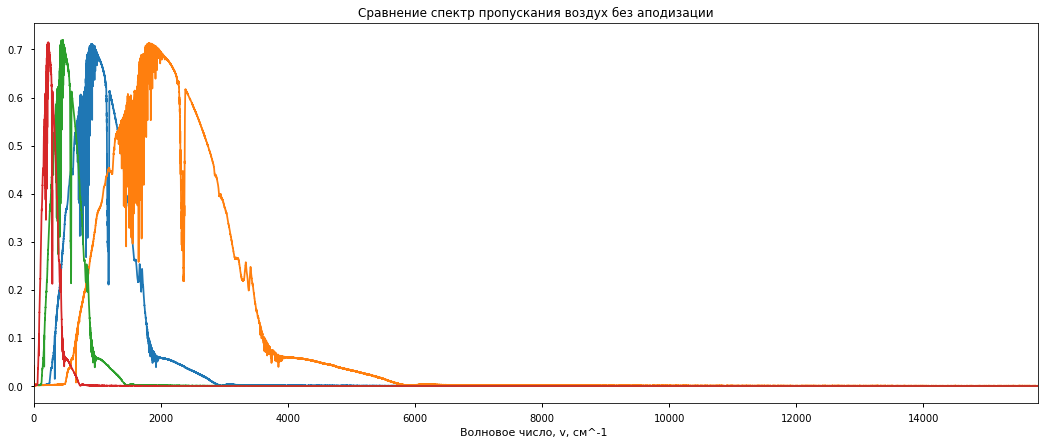

In [7]:
df_r['.1'][0:7238.07].plot()
df_r['.2'][0:7236.14].plot()
df_r['.3'][0:7039.37].plot()
df_r['.4'][0:7139.69].plot().set_title('Сравнение спектр пропускания воздух без аподизации')

Text(0.5, 1.0, 'Сравнение спектр пропускания воздух без аподизации')

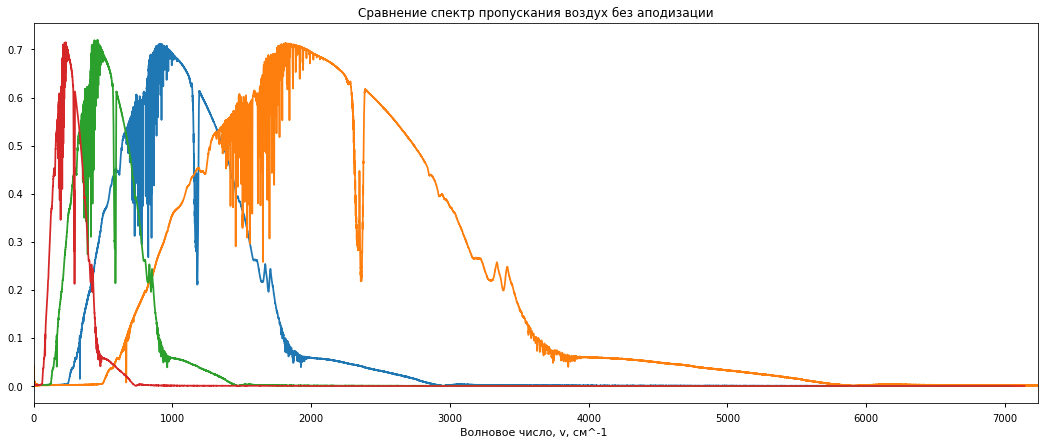

In [8]:
df_r['.1'][0:7238.07].plot()
df_r['.2'][0:7236.14].plot()
df_r['.3'][0:7039.37].plot()
df_r['.4'][0:7139.69].plot().set_title('Сравнение спектр пропускания воздух без аподизации')

In [52]:
first = df_r['.1'][0:7238.07]
second = df_r['.3'][0:7039.37]
fourth = df_r['.4'][0:7139.69]
semi = df_r['.2'][0:7236.14]

In [55]:
ground = np.concatenate((first, second, fourth, semi), axis=0)

In [3]:
n_names = ['Воздух, разрешение 0.5, без апод.', '', '','Воздух, разрешение 0,5, треуг.', ' ', '']
df_a = pd.read_excel('Sravnenie_Apodizatsiy.xlsx', sheet_name='Сравнение аподизаций', header=None, names=n_names, skiprows=1, usecols=[0,1,2,4,5,6])

# Сравнение аподизаций

In [93]:
df_a.head(10)

,"Воздух, разрешение 0.5, без апод.",,.1,"Воздух, разрешение 0,5, треуг.",,.2
0,"Воновое число, см^-1",Интенсивность,Нормировка,"Воновое число, см^-1",Интенсивность,Нормировка
1,0,671469,0.00671469,0,2081260,0.0208126
2,0.24114,2463680,0.0246368,0.24114,2086010,0.0208601
3,0.482281,4317250,0.0431725,0.482281,1921900,0.019219
4,0.723421,2166760,0.0216676,0.723421,1395730,0.0139573
5,0.964562,1216800,0.012168,0.964562,1048770,0.0104877
6,1.2057,705003,0.00705003,1.2057,785837,0.00785837
7,1.44684,1373240,0.0137324,1.44684,604055,0.00604055
8,1.68798,691347,0.00691347,1.68798,528257,0.00528257
9,1.92912,2490950,0.0249095,1.92912,893095,0.00893095


In [4]:
df_a = df_a.set_index('Воздух, разрешение 0.5, без апод.') #вона

Text(0.5, 1.0, 'Спектр пропускания воздух разрешение 0.5 без аподизации')

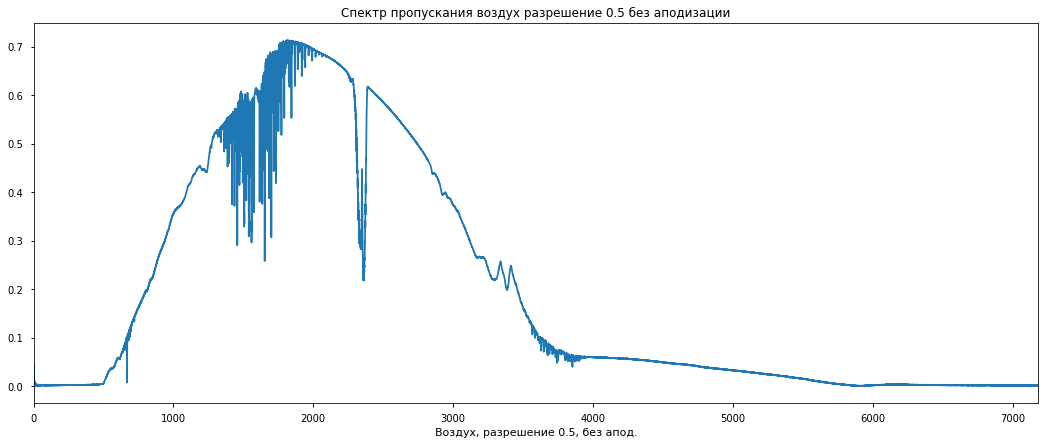

In [8]:
df_a['.1'][0:7181.89].plot().set_title('Спектр пропускания воздух разрешение 0.5 без аподизации')

Text(0.5, 1.0, 'Спектр пропускания воздух разрешение 0.5 c треугольной аподизацией')

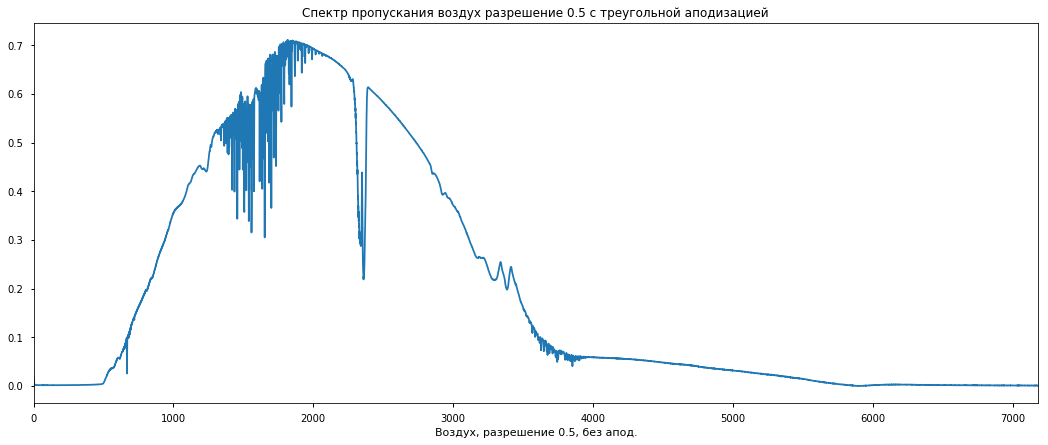

In [21]:
df_a['.2'][0:7181.89].plot().set_title('Спектр пропускания воздух разрешение 0.5 c треугольной аподизацией')

Text(0.5, 1.0, 'Сравнение аподизаций спектр пропускания воздух')

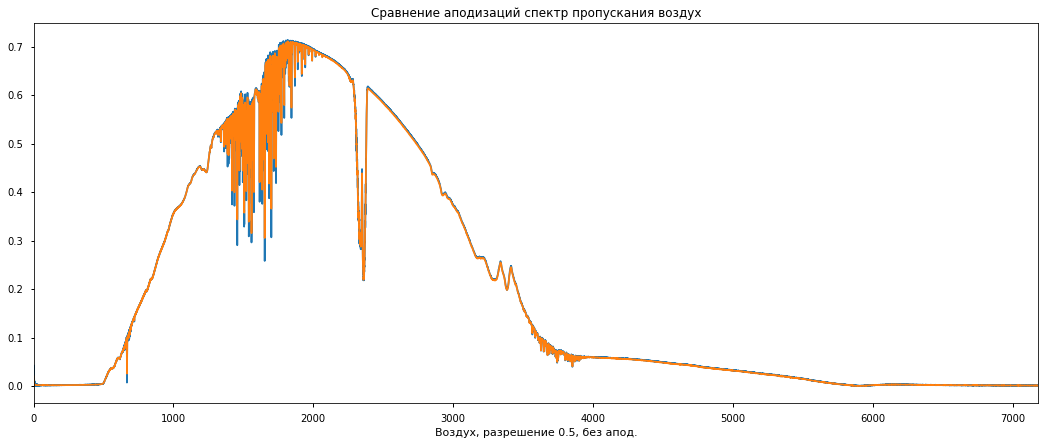

In [9]:
df_a['.1'][0:7181.89].plot()
df_a['.2'][0:7181.89].plot().set_title('Сравнение аподизаций спектр пропускания воздух')

In [10]:
plt.rcParams['figure.figsize'] = (18, 14)

Text(0.5, 1.0, 'Сравнение аподизаций спектр пропускания воздух')

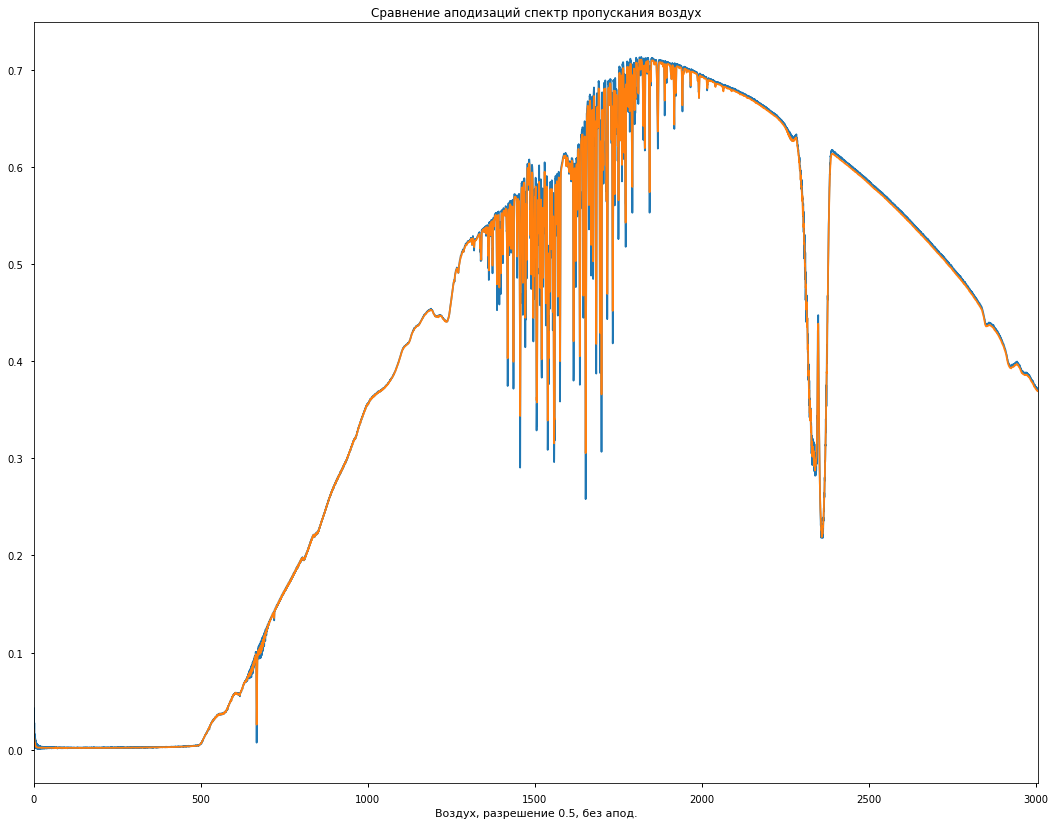

In [11]:
df_a['.1'][0:3006.54].plot()
df_a['.2'][0:3006.54].plot().set_title('Сравнение аподизаций спектр пропускания воздух') # null res

Text(0.5, 1.0, 'Сравнение аподизаций спектр пропускания воздух отдельный пик')

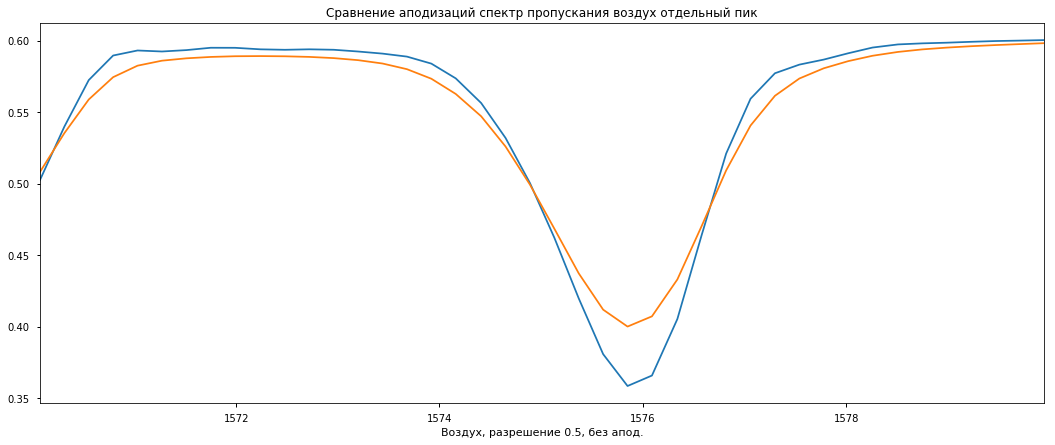

In [16]:
df_a['.1'][1570.07:1579.95].plot()
df_a['.2'][1570.07:1579.95].plot().set_title('Сравнение аподизаций спектр пропускания воздух отдельный пик')

In [94]:
df_a[30000:30010]

,"Воздух, разрешение 0.5, без апод.",,.1,"Воздух, разрешение 0,5, треуг.",,.2
30000,7233.97,107822,0.00107822,7233.97,102621,0.00102621
30001,7234.21,127544,0.00127544,7234.21,106408,0.00106408
30002,7234.45,144106,0.00144106,7234.45,111519,0.00111519
30003,7234.7,137707,0.00137707,7234.7,115672,0.00115672
30004,7234.94,122755,0.00122755,7234.94,117050,0.0011705
30005,7235.18,126973,0.00126973,7235.18,115969,0.00115969
30006,7235.42,146354,0.00146354,7235.42,114744,0.00114744
30007,7235.66,148650,0.0014865,7235.66,115053,0.00115053
30008,7235.9,122580,0.0012258,7235.9,115866,0.00115866
30009,7236.14,96114.5,0.000961145,7236.14,115340,0.0011534


In [95]:
df_a[65527:65537]

,"Воздух, разрешение 0.5, без апод.",,.1,"Воздух, разрешение 0,5, треуг.",,.2
65527,15801,36301.2,0.000363012,15801,37393,0.00037393
65528,15801.2,33944.1,0.000339441,15801.2,34357.5,0.000343575
65529,15801.5,28070.7,0.000280707,15801.5,32372.9,0.000323729
65530,15801.7,38421.1,0.000384211,15801.7,30810.1,0.000308101
65531,15801.9,41438.7,0.000414387,15801.9,29294.1,0.000292941
65532,15802.2,37823.2,0.000378232,15802.2,30209.1,0.000302091
65533,15802.4,38683.2,0.000386832,15802.4,35405.3,0.000354053
65534,15802.7,40348.1,0.000403481,15802.7,41451.4,0.000414514
65535,15802.9,36610.7,0.000366107,15802.9,42754,0.00042754
65536,15803.1,26902.8,0.000269028,15803.1,39752.9,0.000397529


In [3]:
hcl_names = ['Сухая колба, без апод.', '', '', 'HCl, разрешение 0,5, без апод.', '', 'HCl, разрешение 0,5, бипораб.', '']
df_hcl = pd.read_excel('Vse_Pro_HCL.xlsx', sheet_name='Все про HCL', header=None, names=hcl_names, skiprows=1, usecols=[0,1,3,4,5,7,8])

# HCl

In [25]:
df_hcl.head(10)

,"Сухая колба, без апод.",,.1,"HCl, разрешение 0,5, без апод.",.2,"HCl, разрешение 0,5, бипораб.",.3
0,499.884,34911.6,0.034912,499.884,7.25999,499.884,4.36288
1,500.125,41104.8,0.041105,500.125,6.83055,500.125,3.68267
2,500.366,36870.1,0.036870,500.366,5.98245,500.366,4.20402
3,500.608,30492.8,0.030493,500.608,3.73579,500.608,4.93313
4,500.849,30464.0,0.030464,500.849,3.72021,500.849,5.31234
5,501.090,31662.3,0.031662,501.090,4.75329,501.090,4.29076
6,501.331,34942.9,0.034943,501.331,5.37723,501.331,4.64263
7,501.572,35623.8,0.035624,501.572,7.07874,501.572,4.44086
8,501.813,27397.4,0.027397,501.813,6.40373,501.813,4.14318
9,502.054,22917.8,0.022918,502.054,4.89483,502.054,6.28210


In [26]:
df_hcl[10000:10010]

,"Сухая колба, без апод.",,.1,"HCl, разрешение 0,5, без апод.",.2,"HCl, разрешение 0,5, бипораб.",.3
10000,2911.29,25176100.0,25.1761,2911.29,48.9292,2911.29,47.3654
10001,2911.53,25145300.0,25.1453,2911.53,48.8909,2911.53,47.3434
10002,2911.77,25108700.0,25.1087,2911.77,48.8939,2911.77,47.3313
10003,2912.01,25084100.0,25.0841,2912.01,48.9258,2912.01,47.3281
10004,2912.25,25058400.0,25.0584,2912.25,48.9336,2912.25,47.3235
10005,2912.49,25012800.0,25.0128,2912.49,48.8865,2912.49,47.3006
10006,2912.74,24965500.0,24.9655,2912.74,48.8115,2912.74,47.2560
10007,2912.98,24951100.0,24.9511,2912.98,48.7590,2912.98,47.2086
10008,2913.22,24962100.0,24.9621,2913.22,48.7559,2913.22,47.1775
10009,2913.46,24954100.0,24.9541,2913.46,48.8036,2913.46,47.1650


In [27]:
df_hcl[18656:18666]

,"Сухая колба, без апод.",,.1,"HCl, разрешение 0,5, без апод.",.2,"HCl, разрешение 0,5, бипораб.",.3
18656,4998.60,2389880.0,2.38988,4998.60,59.7374,4998.60,58.2862
18657,4998.84,2414980.0,2.41498,4998.84,59.6411,4998.84,58.1871
18658,4999.08,2441730.0,2.44173,4999.08,59.5162,4999.08,58.0216
18659,4999.32,2429310.0,2.42931,4999.32,60.1329,4999.32,58.0133
18660,4999.56,2394120.0,2.39412,4999.56,61.0357,4999.56,57.9559
18661,4999.81,2390500.0,2.39050,4999.81,61.1031,4999.81,57.6653
18662,5000.05,2425560.0,2.42556,5000.05,60.0852,5000.05,57.4363
18663,5000.29,2443730.0,2.44373,5000.29,58.7772,5000.29,57.6025
18664,5000.53,2411980.0,2.41198,5000.53,57.9767,5000.53,57.9729
18665,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
plt.rcParams['figure.figsize'] = (18, 7)

In [4]:
df_hcl = df_hcl.set_index('Сухая колба, без апод.')

Text(0.5, 1.0, 'Спектр пропускания сухой колбы разрешение 0.5 без аподизации')

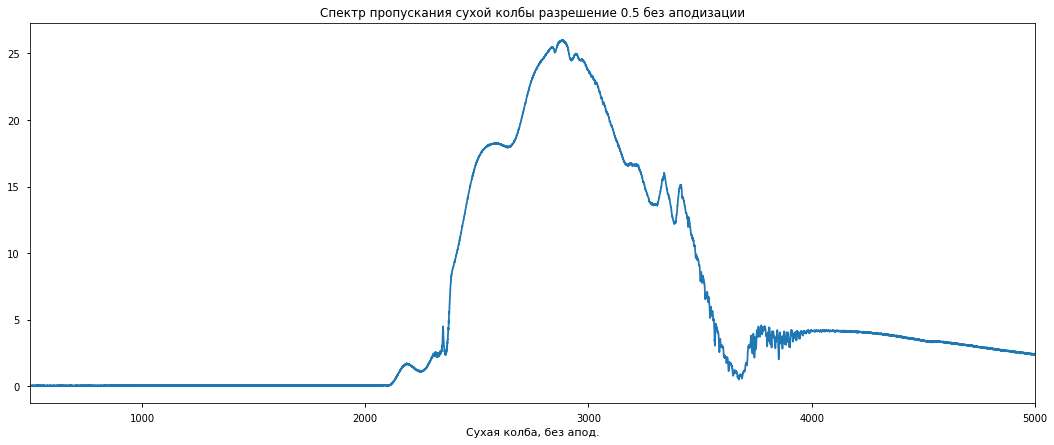

In [29]:
df_hcl['.1'].plot().set_title('Спектр пропускания сухой колбы разрешение 0.5 без аподизации')

Text(0.5, 1.0, 'Спектр пропускания сухой колбы участок разрешение 0.5 без аподизации')

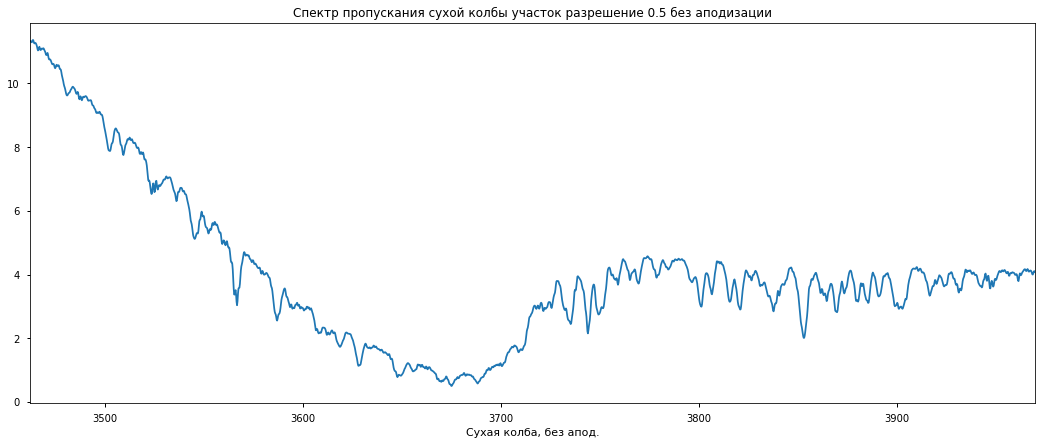

In [30]:
df_hcl['.1'][3462.29:3969.65].plot().set_title('Спектр пропускания сухой колбы участок разрешение 0.5 без аподизации')

Text(0.5, 1.0, 'Спектр пропускания HCl разрешение 0.5 без аподизации')

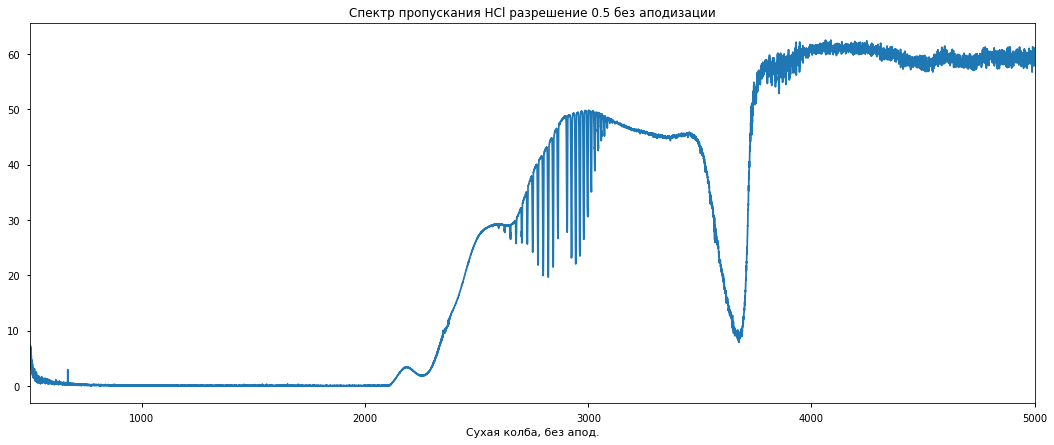

In [32]:
df_hcl['.2'].plot().set_title('Спектр пропускания HCl разрешение 0.5 без аподизации')

Text(0.5, 1.0, 'Спектр пропускания сухой колбы разрешение 0.5 аподизация бипарабола')

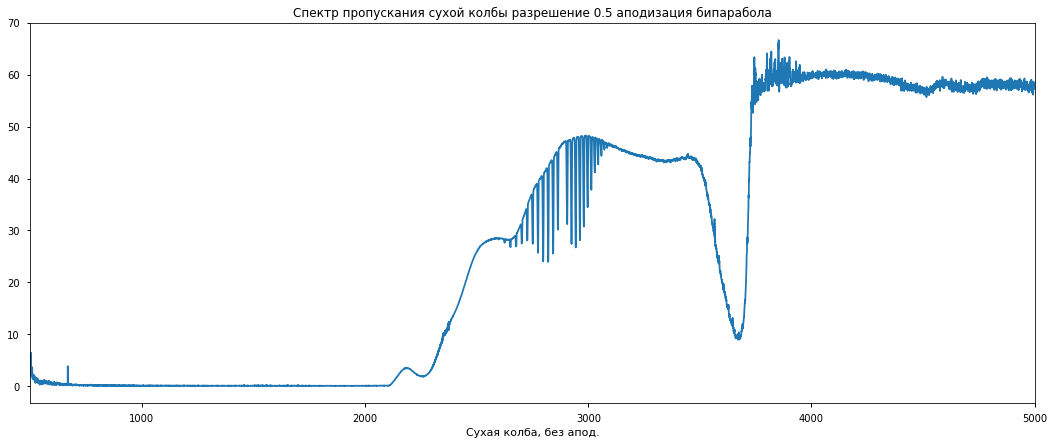

In [33]:
df_hcl['.3'].plot().set_title('Спектр пропускания HCl разрешение 0.5 аподизация бипарабола')

In [5]:
df_hcl_t = pd.read_csv('HCL12triangle.ascii', header=None, sep='\t', names=['HCl, разрешение 0,5, треуг.', ''])

In [58]:
df_hcl_t.head()

,"HCl, разрешение 0,5, треуг.",
0,499.884,3.41761
1,500.125,3.68159
2,500.366,2.83603
3,500.608,1.92633
4,500.849,2.60005


In [6]:
df_hcl_t = df_hcl_t.set_index('HCl, разрешение 0,5, треуг.')

Text(0.5, 1.0, 'Сравнение спектр пропускания HCl аподизация')

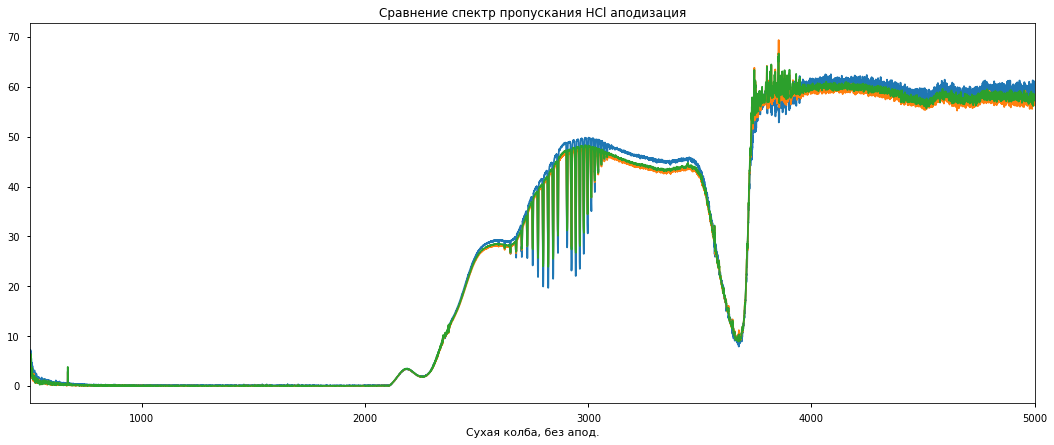

In [7]:
df_hcl['.2'].plot()
df_hcl_t[''].plot()
df_hcl['.3'].plot().set_title('Сравнение спектр пропускания HCl аподизация')

Text(0.5, 1.0, 'Сравнение спектр пропускания HCl с фоном')

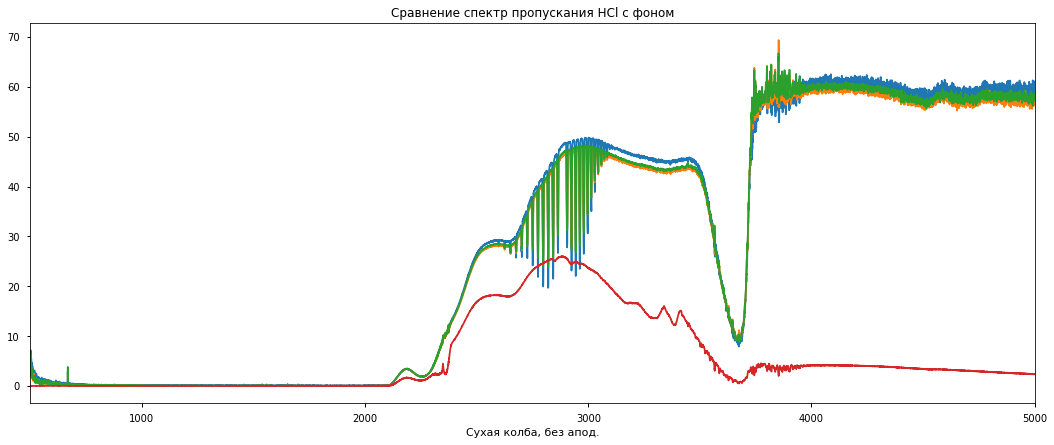

In [9]:
df_hcl['.2'].plot().set_title
df_hcl_t[''].plot()
df_hcl['.3'].plot()
df_hcl['.1'].plot().set_title('Сравнение спектр пропускания HCl с фоном')

In [10]:
spectrum = pd.read_excel('Spektr.xlsx', sheet_name='Sheet1', header=None, names=['Волновое число, v, см^-1', 'Интенсивность поглощения'], skiprows=2, usecols=[6,9])

# Спектр

In [100]:
spectrum.head()

,"HCl, разрешение 0,5, без апод.",
0,"Волновое число, см^-1",Теперь точно поглощение
1,2316.4,0.948765
2,2316.64,0.94915
3,2316.88,0.948555
4,2317.12,0.946552


In [11]:
spectrum = spectrum.set_index('Волновое число, v, см^-1')

Text(0.5, 1.0, 'Спектр поглощения HCl без аподизации')

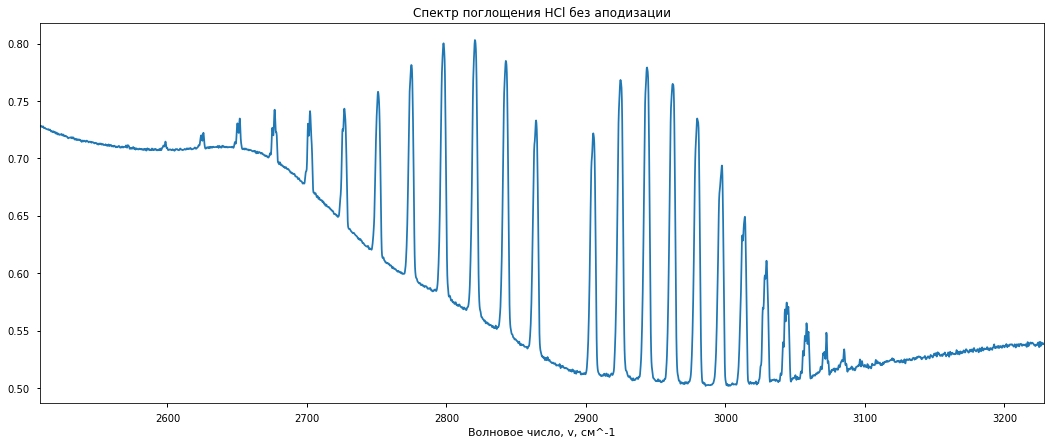

In [140]:
spectrum['Интенсивность поглощения'][2508.58:3228.63].plot().setset_title('Спектр поглощения HCl без аподизации')

In [21]:
spectrum_bp = pd.read_excel('Spektr.xlsx', sheet_name='Sheet1', header=None, names=['Волновое число, v, см^-1', 'Интенсивность поглощения'], usecols=[4,5])

In [22]:
spectrum_bp = spectrum_bp.set_index('Волновое число, v, см^-1')

Text(0.5, 1.0, 'Спектр поглощения HCl аподизация бипарабола')

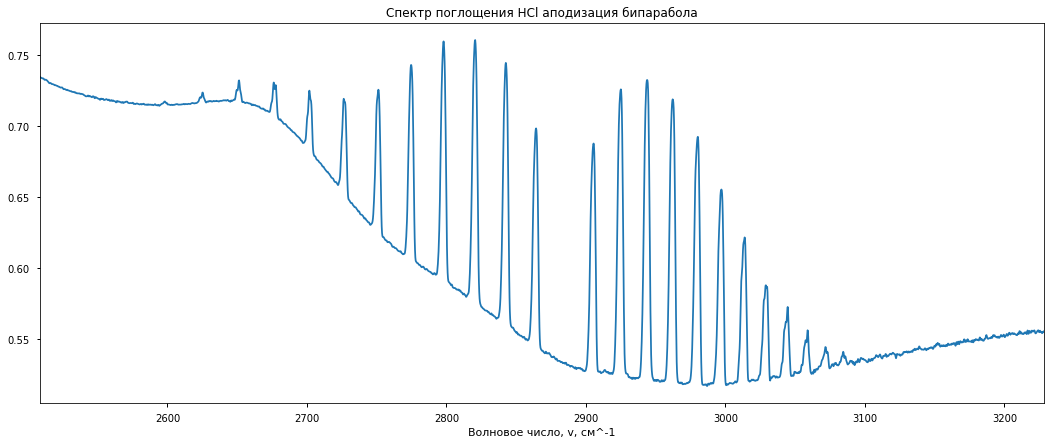

In [50]:
spectrum_bp['Интенсивность поглощения'][2508.58:3228.63].plot().set_title('Спектр поглощения HCl аподизация бипарабола')

In [17]:
spectrum_t= pd.read_csv('HCL12triangle.ascii', header=None, sep='\t', names=['Волновое число, v, см^-1', 'Интенсивность поглощения'])

In [18]:
spectrum_t['Интенсивность поглощения'] = 1 - spectrum_t['Интенсивность поглощения']/100

In [19]:
spectrum_t.head()

,"Волновое число, v, см^-1",Интенсивность поглощения
0,499.884,0.965824
1,500.125,0.963184
2,500.366,0.971640
3,500.608,0.980737
4,500.849,0.974000


In [23]:
spectrum_t = spectrum_t.set_index('Волновое число, v, см^-1')

In [ ]:
df_hcl_t[''][2508.58:3228.63].plot().set_title('Спектр поглощения')

Text(0.5, 1.0, 'Сравнение спектр поглощения HCl аподизации')

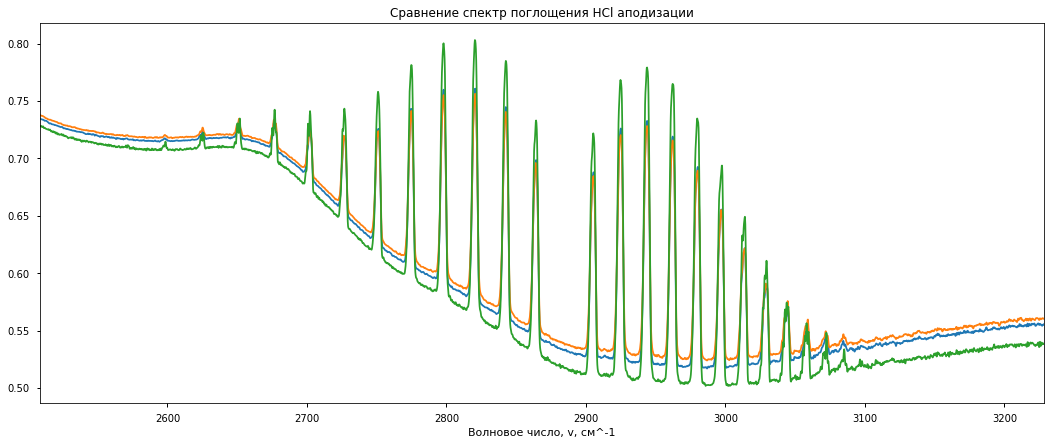

In [24]:
spectrum_bp['Интенсивность поглощения'][2508.58:3228.63].plot()
spectrum_t['Интенсивность поглощения'][2508.58:3228.63].plot()
spectrum['Интенсивность поглощения'][2508.58:3228.63].plot().set_title('Сравнение спектр поглощения HCl аподизации')

In [160]:
x = np.array(spectrum['Волновое число, v, см^-1'][800:3786])
y = np.array(spectrum['Интенсивность поглощения'][800:3786])

In [175]:
peakind = find_peaks_cwt(y, np.arange(1,25))
peakind

array([   4,   64,   95,  137,  142,  178,  207,  232,  260,  275,  319,
        370,  424,  439,  482,  542,  589,  696,  801,  904, 1004, 1102,
       1198, 1292, 1384, 1473, 1644, 1725, 1804, 1879, 1954, 2025, 2093,
       2158, 2219, 2278, 2336, 2388, 2410, 2436, 2458, 2484, 2532, 2577,
       2610, 2664, 2686, 2723, 2750, 2775, 2808, 2813, 2834, 2870, 2884,
       2913, 2946, 2982], dtype=int32)

In [176]:
x[peakind]

array([2510.27, 2524.74, 2532.22, 2542.34, 2543.55, 2552.23, 2559.22,
       2565.25, 2572.  , 2575.62, 2586.23, 2598.53, 2611.55, 2615.17,
       2625.54, 2640.01, 2651.34, 2677.14, 2702.46, 2727.3 , 2751.41,
       2775.04, 2798.19, 2820.86, 2843.05, 2864.51, 2905.74, 2925.27,
       2944.32, 2962.41, 2980.5 , 2997.62, 3014.01, 3029.69, 3044.4 ,
       3058.63, 3072.61, 3085.15, 3090.46, 3096.73, 3102.03, 3108.3 ,
       3119.88, 3130.73, 3138.68, 3151.71, 3157.01, 3165.93, 3172.44,
       3178.47, 3186.43, 3187.64, 3192.7 , 3201.38, 3204.76, 3211.75,
       3219.71, 3228.39])

In [177]:
y[peakind]

array([0.727405, 0.719987, 0.718465, 0.715297, 0.713944, 0.712972,
       0.711796, 0.710812, 0.71099 , 0.709728, 0.707573, 0.714652,
       0.707452, 0.708654, 0.720904, 0.710334, 0.725979, 0.737024,
       0.737768, 0.73784 , 0.754155, 0.780981, 0.797659, 0.800069,
       0.781357, 0.730906, 0.718173, 0.764893, 0.775348, 0.764461,
       0.731162, 0.693723, 0.649158, 0.607975, 0.564812, 0.543695,
       0.545921, 0.533734, 0.518766, 0.5234  , 0.520554, 0.521439,
       0.525028, 0.524671, 0.527477, 0.528133, 0.530249, 0.532459,
       0.533741, 0.533909, 0.534072, 0.535632, 0.538005, 0.538298,
       0.537709, 0.53829 , 0.539257, 0.53882 ])

# Результаты

In [29]:
sp_names =  names=['Волновое число, v, левая ветвь P, см^-1', 'j’', 'j’’', 'Волновое число, v, правая ветвь R, см^-1', 'j’ ', 'j’’ ' ]
sp_data = pd.read_excel('Vse_Narabotki.xlsx', sheet_name='Sheet1', header=None,names=sp_names, skiprows=48, usecols=[14,15,16,18,19,20])

In [30]:
sp_data.head(13)

,"Волновое число, v, левая ветвь P, см^-1",j’,j’’,"Волновое число, v, правая ветвь R, см^-1",j’,j’’
0,2864.51,0,1.0,2905.74,1.0,0
1,2843.05,1,2.0,2925.27,2.0,1
2,2820.86,2,3.0,2944.32,3.0,2
3,2798.19,3,4.0,2962.41,4.0,3
4,2775.04,4,5.0,2980.5,5.0,4
5,2751.41,5,6.0,2997.62,6.0,5
6,2727.3,6,7.0,3014.01,7.0,6
7,2702.46,7,8.0,3029.69,8.0,7
8,2677.14,8,9.0,3044.4,9.0,8
9,2651.34,9,10.0,3058.63,10.0,9


In [46]:
sp_names =  names=['Растяжение, D0*10−6, см^-1', 'j’+1/2', 'Растяжение, D1*10−6, см^-1', 'J”+1/2', 'DF’/(j’+1/2)', '(j’ + 1/2)^2', 'DF”/(j”+1/2)', '(j”+ 1/2)^2' ]
sp_data = pd.read_excel('Vse_Narabotki.xlsx', sheet_name='Sheet1', header=None,names=sp_names, skiprows=48, usecols=[22,23,25,26,28,29,31,32])

In [47]:
sp_data.head(11)

,"Растяжение, D0*10−6, см^-1",j’+1/2,"Растяжение, D1*10−6, см^-1",J”+1/2,DF’/(j’+1/2),(j’ + 1/2)^2,DF”/(j”+1/2),(j”+ 1/2)^2
0,60.76,1.5,84.88,1.5,40.506667,2.25,56.586667,2.25
1,101.27,2.5,127.08,2.5,40.508000,6.25,50.832000,6.25
2,141.55,3.5,169.28,3.5,40.442857,12.25,48.365714,12.25
3,182.31,4.5,211.00,4.5,40.513333,20.25,46.888889,20.25
4,222.58,5.5,253.20,5.5,40.469091,30.25,46.036364,30.25
5,262.60,6.5,295.16,6.5,40.400000,42.25,45.409231,42.25
6,302.39,7.5,336.87,7.5,40.318667,56.25,44.916000,56.25
7,341.94,8.5,378.35,8.5,40.228235,72.25,44.511765,72.25
8,381.49,9.5,404.39,9.5,40.156842,90.25,42.567368,90.25
9,421.27,10.5,433.09,10.5,40.120952,110.25,NaN,NaN


In [43]:
sp_data = pd.read_excel('Vse_Narabotki.xlsx', skiprows=86, usecols=[14,15,17,18])

# Оценка частоты w

In [45]:
sp_data.head(13)

,"v_P, cm^-1",J’+1,"v_R, cm^-1",J”+1
0,2864.51,1.0,2905.74,1.0
1,2843.05,2.0,2925.27,2.0
2,2820.86,3.0,2944.32,3.0
3,2798.19,4.0,2962.41,4.0
4,2775.04,5.0,2980.50,5.0
5,2751.41,6.0,2997.62,6.0
6,2727.30,7.0,3014.01,7.0
7,2702.46,8.0,3029.69,8.0
8,2677.14,9.0,3044.40,9.0
9,2651.34,10.0,3058.63,10.0


In [76]:
sp_names = ['v_P, cm^-1', 'v_R, cm^-1', 'DF’_2', 'w(1-2x)', '']
sp_data = pd.read_excel('Vse_Narabotki.xlsx', header=None, names=sp_names, skiprows=48, usecols=[14,18,22,24,23])

In [77]:
sp_data.head(13)

,"v_P, cm^-1","v_R, cm^-1",DF’_2,w(1-2x),
0,2864.51,2905.74,0.006076,415.200000,0.002
1,2843.05,2925.27,0.010127,425.400000,0.004
2,2820.86,2944.32,0.014155,2031.000000,0.002
3,2798.19,2962.41,0.018231,1246.200000,0.006
4,2775.04,2980.5,0.022258,3651.600000,0.002
5,2751.41,2997.62,0.026260,2052.000000,0.008
6,2727.3,3014.01,0.030239,5247.800000,0.002
7,2702.46,3029.69,0.034194,2838.800000,0.010
8,2677.14,3044.4,0.038149,2829.800000,0.012
9,2651.34,3058.63,0.042127,2825.400000,0.014


# mean w(1-2x)

In [82]:
print(2369.636364, ', см-1', sep='')

2369.636364, см-1
